
<div>
    <div style="background-color : pink">
    <h1 style="margin: auto; padding: 30px;color: #fff">
            Projet 10 - Détecter des faux billets 
        </h1>
    </div> 
    

<div>
    <div style="background-color : fff">
    <h1 style="text-align: center; padding: 30px;color: pink">
            K-Means Clustering 
        </h1>
    </div> 

<div>
    <h3 style="margin: auto; padding: 10px; color: pink;margin-left: 4.5em; text-indent: -4.5em">Ce programme est organisé en plusieurs partie :
        </h3>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;margin-left: 4.5em; text-indent: -4.5em">
            <lu>
                <li><a href="#partie1">Partie 1</a> : Librairies et fonction</li>
                <li><i> 1.1 - Importation des librairies</i></li>
                <li><i> 1.2 - Définition d'une fonction</i></li>
                <li><a href="#partie2">Partie 2</a> : Importation et visualisation des données </li>
                <li><a href="#partie3">Partie 3</a> : Données centrées réduites</li>
                <li><a href="#partie4">Partie 4</a> : Train Test Split</li>
                <li><a href="#partie5">Partie 5</a> : K-Means</li>
                <li><i> 5.1 - Méthode du coude</i></li>
                <li><i> 5.2 - Clustering</i></li>
                <li><i> 5.3 - Projection des individus et de leur centroïde (premier plan factoriel)</i></li>
                <li><i> 5.4 -  Matrice de confusion K-Means</i></li>
                <li><a href="#partie6">Partie 6</a> : Prédiction</li>
                <li><i> 6.1 - Prédiction et visualisation du modèle test</i></li>
                <li><i> 6.2 - Matrice de confusion de prédiction</i></li>
                <li><i> 5.3 - Test d'accuracy</i></li>
                <li><a href="#Conclusion">Conclusion</a></li>
        </lu>
        </div>
    </div>
</div>

---
## <font color=pink> Lexique des données </font>

<font> - Dimensions exprimées en mm </font>
 
* is_genuine : Indique si le billet est vrai (True) ou faux (False)
* diagonal : la diagonale du billet 
* height_left : la hauteur côté gauche du billet 
* height_right : La hauteur côté droit du billet 
* margin_low : la marge entre le bord inférieur du billet et l'image de celui-ci 
* margin_up : la marge entre le bord supérieur du billet et l'image de celui-ci
* length : la longueur du billet 


---
<div>
    <div style="background-color: pink;" id="partie1">
        <h2 style="margin: auto; padding: 20px; color: #fff; margin-left: 4.5em; text-indent: -4.5em">
            Partie 1 - Librairies et fonctions
        </h2>
        <lu>
                <li><i> 1.1 - Importation des librairies</i></li>
                <li><i> 1.2 - Définition d'une fonction</i></li>
            <lu>
                <div>
                    <div>
                        <div>                                                                                                  

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            1.1 - Importation des librairies 
        </h3>
    </div>
           

In [1]:
# https://www.it-swarm-fr.com/fr/python/limiter-le-nombre-de-threads-dans-numpy/1053395822/
import os
os.environ["OMP_NUM_THREADS"] = "1" # export OMP_NUM_THREADS=1 pour des problème de la mémoire de KMeans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import sklearn.metrics
from sklearn import decomposition
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            1.2 - Définition d'une fonction 
        </h3>
    </div>
          

In [2]:
def analyseDataFrame(df):
    """Fonction qui prend en arguments un dataframe pour analyse."""

    name =[x for x in globals() if globals()[x] is df][0]
    print("La dimension de DataFrame « " + name  +" » : " + str(df.shape) + " (lignes, colonnes)\n")
    display(temp_var = df.info())
    display(df.describe().T)
    display(df.head(5))
    
    # Afficher les colonnes qui sont unique dans le DataFrame df
    print("Test d'unicité sur les colonnes de DataFrame :")
    test_unicite = 0
    for col in df.columns :
        if df[col].size == df.drop_duplicates(col)[col].size :
          display(f'« {col:s} » est unique, et pourrait être une clé primaire.')
          test_unicite = 1
    if test_unicite == 0 :
        print("Il n'y a pas d'unicité dans aucune colonne. Il n'y a pas de clé primaire")

    print("Compter les nulles pour chaque colonne :")
    display(df.isnull().sum())
    
    print("Compter les duplicates:")
    display(df.duplicated().sum())
    

---
<div>
    <div style="background-color: pink;" id="partie2">
        <h2 style="margin: auto; padding: 20px; color: #fff; margin-left: 4.5em; text-indent: -4.5em">
            Partie 2 - Importation et visualisation des données
        </h2>
        <lu>
                <li><i> 2.1 - Importation du DataFrame</i></li>
                <li><i> 2.2 - Initialisation du DataFrame</i></li>
            <lu>
                <div>
                    <div>
                        <div> 

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            2.1 - Importation du DataFrame 
        </h3>
    </div>

In [3]:
# Importation du dataFrame
Df_billets_final = pd.read_csv("Df_billets_final.csv", sep=";") 

# visualisation du dataFrame
analyseDataFrame(Df_billets_final)


La dimension de DataFrame « Df_billets_final » : (1500, 8) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1500 non-null   int64  
 1   is_genuine    1500 non-null   bool   
 2   diagonal      1500 non-null   float64
 3   height_left   1500 non-null   float64
 4   height_right  1500 non-null   float64
 5   margin_low    1500 non-null   float64
 6   margin_up     1500 non-null   float64
 7   length        1500 non-null   float64
dtypes: bool(1), float64(6), int64(1)
memory usage: 83.6 KB


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1500.0,749.500000,433.157015,0.00,374.75,749.50,1124.25,1499.00
diagonal,1500.0,171.958440,0.305195,171.04,171.75,171.96,172.17,173.01
height_left,1500.0,104.029533,0.299462,103.14,103.82,104.04,104.23,104.88
height_right,1500.0,103.920307,0.325627,102.82,103.71,103.92,104.15,104.95
margin_low,1500.0,4.483475,0.659632,2.98,4.02,4.31,4.87,6.90
margin_up,1500.0,3.151473,0.231813,2.27,2.99,3.14,3.31,3.91
length,1500.0,112.678500,0.872730,109.49,112.03,112.96,113.34,114.44


,Unnamed: 0,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,4,True,171.73,104.28,103.46,4.04,3.48,112.54


Test d'unicité sur les colonnes de DataFrame :


'« Unnamed: 0 » est unique, et pourrait être une clé primaire.'

Compter les nulles pour chaque colonne :


Unnamed: 0      0
is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

Compter les duplicates:


0

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            2.2 - Initialisation du DataFrame 
        </h3>
    </div>

In [4]:
# Attribution des variables explicatives pour "X_df" et de la variable binaire pour "Y_df"
X_df = Df_billets_final [["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]]
y_df = Df_billets_final [["is_genuine"]]


In [5]:
# Visualisation du nombre de valeurs total
print("X_df :", X_df.shape)

# Visualisation du nombre de chaque valeurs pour y_df
print("y_df Vrai :", y_df[y_df["is_genuine"] == 1].shape)
print("y_df Faux :", y_df[y_df["is_genuine"] == 0].shape)


X_df : (1500, 6)
y_df Vrai : (1000, 1)
y_df Faux : (500, 1)


---
<div>
    <div style="background-color: pink;" id="partie3">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Partie 3 - Données centrées réduites
        </h2>
        <font size="-0"><a href="#partie0">  🔝  </a></font>
    </div>
</div>
    

### Centrer réduire des données équivaut à un changement d'unité en les standardisant, rendant toutes les valeurs en unité compatible.
### Une variable centrée réduite a une valeur moyenne de 0 et un écart type de 1.

In [6]:
# Soustraire la moyenne de chaque colonne à chaque valeur : centrer les valeurs
X_CR_df = X_df.sub(X_df.mean())
print("Means : \n",X_df.mean())
print()

# Divisé les valeurs de la dataframe par l'écart-type de chaque colonne : réduire les valeurs
X_CR_df = X_CR_df.div(X_df.std()) 
print("Ecart-type : \n",X_df.std())


Means : 
 diagonal        171.958440
height_left     104.029533
height_right    103.920307
margin_low        4.483475
margin_up         3.151473
length          112.678500
dtype: float64

Ecart-type : 
 diagonal        0.305195
height_left     0.299462
height_right    0.325627
margin_low      0.659632
margin_up       0.231813
length          0.872730
dtype: float64


---
<div>
    <div style="background-color: pink;" id="partie4">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Partie 4 - Train Test Split
        </h2>
        <font size="-0"><a href="#partie0">  🔝  </a></font>
    </div>
</div>

### Le but est de créer deux jeux de données un Train set (X_train, y_train) utiliser dans la méthode "fit()" pour l'entraînement de notre modèle et un Test set (X_test, y_test) utilisé dans la méthode "score()" pour évaluer notre modèle.

In [7]:
# Divise le dataFrame entre Train set et Test set
X_train, X_test, y_train, y_test = train_test_split(X_CR_df, y_df, test_size=0.2, random_state=0, stratify = y_df)

# Visualisation de "X_train" et de "y_train"
print("X_train set :", X_train.shape)
print("y_train set :", y_train.shape)
print("Vrai_Train set :", y_train[y_train["is_genuine"] == 1].shape)
print("Faux_Train set :",y_train[y_train["is_genuine"] == 0].shape)
Pourcentage_Train_Vrai = round(y_train[y_train["is_genuine"] == 1].shape[0] / X_train.shape[0],2)*100
print("Pourcentage Vrai billets:", Pourcentage_Train_Vrai, "%")
Pourcentage_Train_Faux = round(y_train[y_train["is_genuine"] == 0].shape[0] / X_train.shape[0],2)*100
print("Pourcentage Faux billets:", Pourcentage_Train_Faux, "%")


X_train set : (1200, 6)
y_train set : (1200, 1)
Vrai_Train set : (800, 1)
Faux_Train set : (400, 1)
Pourcentage Vrai billets: 67.0 %
Pourcentage Faux billets: 33.0 %


In [8]:
# Visualisation de "X_test" et de "y_test"
print("X Test set :", X_test.shape)
print("y Test set :", y_test.shape)
print("Vrai_Test set :", y_test[y_test["is_genuine"] == 1].shape)
print("Faux_Test set :", y_test[y_test["is_genuine"] == 0].shape)
Pourcentage_Test_Vrai = round(y_test[y_test["is_genuine"] == 1].shape[0] / X_test.shape[0],2)*100
print("Pourcentage Vrai billets:", Pourcentage_Test_Vrai, "%")
Pourcentage_Test_Faux = round(y_test[y_test["is_genuine"] == 0].shape[0] / X_test.shape[0],2)*100
print("Pourcentage Faux billets:", Pourcentage_Test_Faux, "%")


X Test set : (300, 6)
y Test set : (300, 1)
Vrai_Test set : (200, 1)
Faux_Test set : (100, 1)
Pourcentage Vrai billets: 67.0 %
Pourcentage Faux billets: 33.0 %


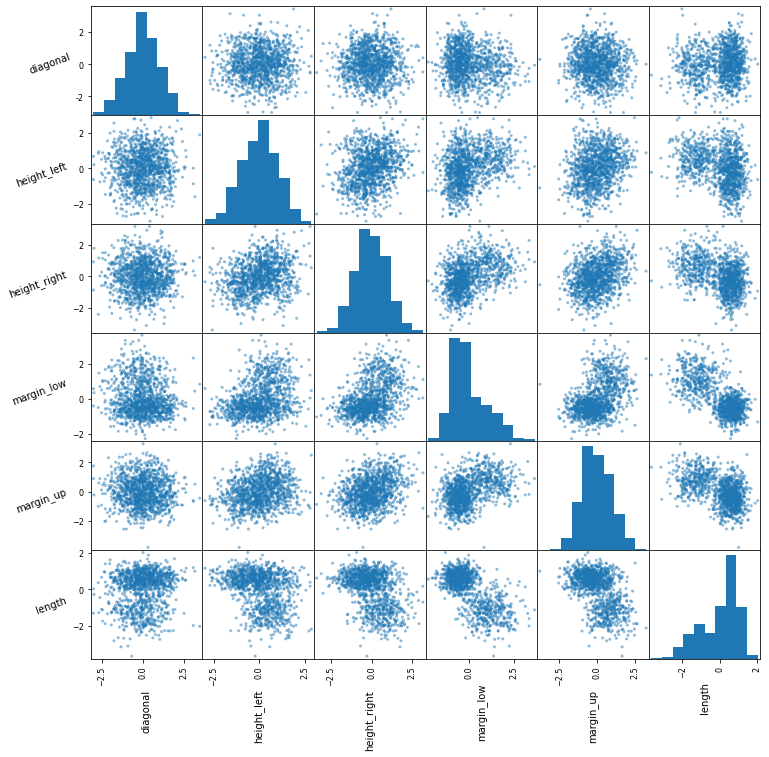

In [9]:
# Graphique - croisement deux à deux des variables
# Décele si deux variables varient dans le même sens
A = pd.plotting.scatter_matrix(X_train,figsize=(12,12))
for ax in A.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(20)
    ax.yaxis.label.set_ha("right")
    

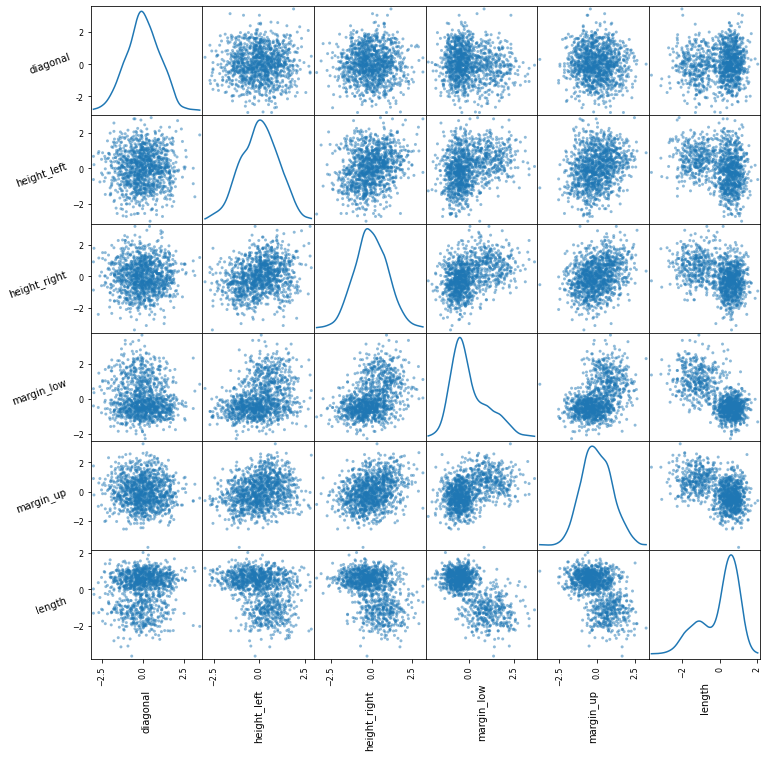

In [10]:
# Graphique - croisement deux à deux des variables
# Décele si deux variables varient dans le même sens
A = pd.plotting.scatter_matrix(X_train, figsize=(12,12), diagonal = "kde")
for ax in A.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(20)
    ax.yaxis.label.set_ha("right")
    

---
<div>
    <div style="background-color: pink;" id="partie5">
        <h2 style="margin: auto; padding: 20px; color: #fff; margin-left: 4.5em; text-indent: -4.5em">
            Partie 5 - K-Means Clustering
        </h2>
        <lu>
                <li><i> 5.1 - Méthode du coude</i></li>
                <li><i> 5.2 - Clustering</i></li>
                <li><i> 5.3 - Projection des individus et de leur centroïde (premier plan factoriel)</i></li>
                <li><i> 5.4 -  Matrice de confusion K-Means</i></li>
            <lu>
                <div>
                    <div>
                        <div>
                            <div>
                                <div>
                        

### K-means est un algorithme non supervisé de clustering non hiérarchique. Il permet de regrouper en clusters distincts les observations du data set. Ainsi les données similaires se retrouveront dans un même cluster.

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            5.1 - Méthode du coude
    </div>

### La méthode du coude permet de déterminer la valeur optimal de K, dertiminant ainsi le nombre de cluster au « coude », c’est-à-dire le point où la distorsion/inertie commence à diminuer de manière linéaire.

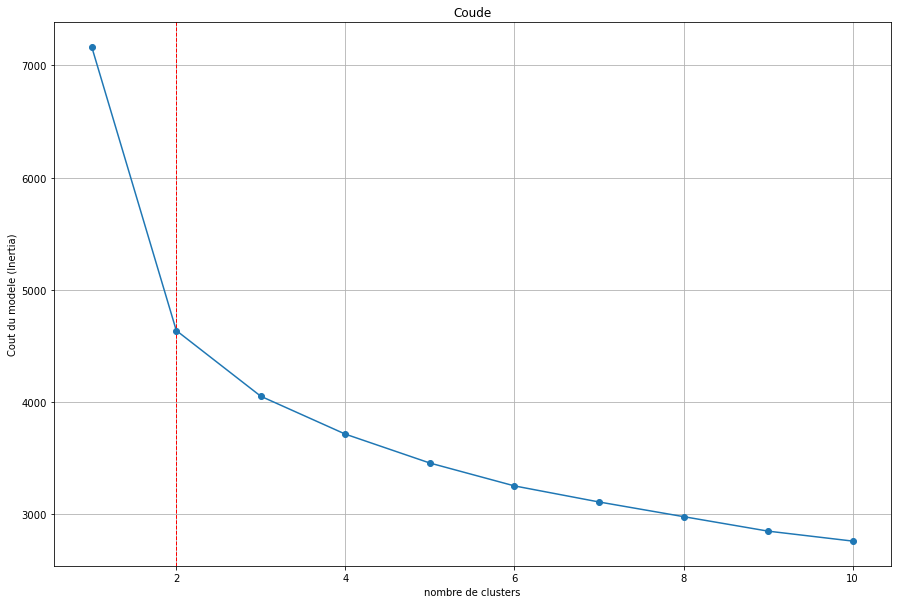

Inertie Totale: 2760.0055071010725


In [11]:
# Elbow méthod
plt.figure(figsize=(15, 10))

inertia = []
K_range = range(1, 11)
for k in K_range:
    model = KMeans(n_clusters=k, random_state=3425).fit(X_train)
    inertia.append(model.inertia_)
    
KM_nbr_cluster = 2
_ = plt.axvline(x = KM_nbr_cluster, color ="red", linestyle ="--", linewidth=1)

_ = plt.plot(K_range, inertia,marker='o')
_ = plt.xlabel("nombre de clusters")
_ = plt.ylabel("Cout du modele (Inertia)")
plt.title ("Coude")
plt.grid()
plt.show()
print("Inertie Totale:", model.inertia_)

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            5.2 - Clustering
    </div>

In [12]:
# Calcul des groupes
Kmeans = KMeans(n_clusters = 2, random_state=3425)
clusters = Kmeans.fit_predict(X_train)
Kmeans.fit(X_train)


KMeans(n_clusters=2, random_state=3425)

In [13]:
# Clusters pour chaque individus
Kmeans_clusters = Kmeans.labels_
Kmeans_clusters


array([1, 0, 0, ..., 0, 0, 1], dtype=int32)

In [14]:
# Visualisation des clusters pour pour chaque individus
x_train_temp = X_train.copy()
x_train_temp["Cluster"] =  Kmeans.labels_
Df_Train_full = pd.concat([x_train_temp, y_train], axis = 1)
Df_Train_full


,diagonal,height_left,height_right,margin_low,margin_up,length,Cluster,is_genuine
1189,1.020855,0.101738,0.981777,1.434929,0.856408,-2.736815,1,False
630,-0.486377,-0.399161,-0.430881,-1.248386,0.554441,1.044424,0,True
501,-1.731482,1.303895,-1.567151,-0.641987,-0.092632,0.666300,0,True
10,-0.420846,0.368884,-0.922241,-2.006385,0.123059,0.620467,0,True
944,-1.829780,-0.499340,-1.167921,-1.111947,-1.516193,0.379843,0,True
...,...,...,...,...,...,...,...,...
1040,-2.452333,0.869783,1.503847,0.995290,0.468164,-1.739943,1,False
1093,-0.257016,-0.365767,1.073907,3.360246,-0.178908,-2.003484,1,False
734,0.005111,-2.102217,1.135327,-1.081627,0.381888,0.219426,0,True
587,0.791494,-0.699700,-0.553721,-0.399428,-0.524014,1.159007,0,True


<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            5.3 - Projection des individus et de leur centroïde (premier plan factoriel)
    </div>

/Users/jenny/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


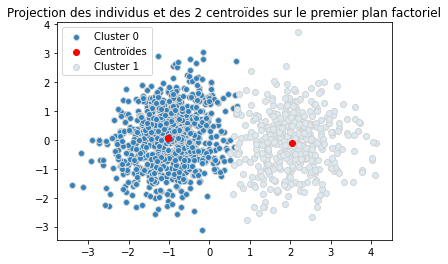

In [15]:
# Ajout d'une colonne contenant le cluster attribue:
clusters_Kmeans = Kmeans.labels_
centroids_Kmeans = Kmeans.cluster_centers_

# Clustering par projection des individus sur le premier plan factoriel:
pca_Kmeans = decomposition.PCA(n_components=3).fit(X_train[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
acp_Kmeans = PCA(n_components=3).fit_transform(X_train[["diagonal","height_left","height_right","margin_low","margin_up","length"]])

centroids_Kmeans_projected = pca_Kmeans.transform(centroids_Kmeans)

# Graphique:
for couleur,k in zip(["#3182bd","#dbe9f3"],[0,1]):
    plt.scatter(acp_Kmeans[Kmeans.labels_==k,0],acp_Kmeans[Kmeans.labels_==k,1],c=couleur,edgecolors="#D3D3D3",label="Cluster {}".format(k))
    plt.legend()
    plt.scatter(centroids_Kmeans_projected[:,0],centroids_Kmeans_projected[:,1],color="red",label="Centroïdes")

_ = plt.title("Projection des individus et des {} centroïdes sur le premier plan factoriel".format(len(centroids_Kmeans)))
_ = plt.show()


<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            5.4 - Matrice de confusion K-Means
    </div>

is_genuine  False  True
row_0                  
0              10   790
1             390    10


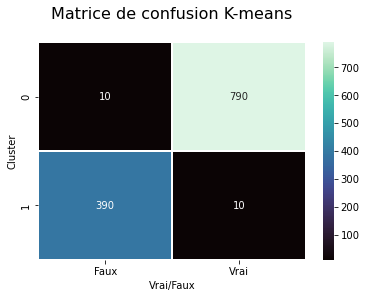

In [16]:
# Verrification de la classification: Matrice de confusion:
k_means_matrix = pd.crosstab(clusters_Kmeans,Df_Train_full["is_genuine"])
print(k_means_matrix)
# Graphique:
_ = sns.heatmap(k_means_matrix,
            annot = True,
            fmt = ".3g", 
             cmap = sns.color_palette("mako", as_cmap=True),
            linecolor = "white",
            linewidths = 0.3,
            xticklabels = ["Faux","Vrai"],
            yticklabels=["0","1"]
            )

_ = plt.xlabel("Vrai/Faux")
_ = plt.ylabel("Cluster")
_ = plt.title("Matrice de confusion K-means\n", fontsize=16)


### Nous considérons que le cluster 0 est le cluster des billets "Vrai" et le cluster 1 est celui des "Faux"


---
<div>
    <div style="background-color: pink;" id="partie6">
        <h2 style="margin: auto; padding: 20px; color: #fff; margin-left: 4.5em; text-indent: -4.5em">
            Partie 6 - Prédiction
        </h2>
        <lu>
                <li><i> 6.1 - Prédiction et visualisation du modèle test</i></li>
                <li><i> 6.2 - Matrice de confusion de prédiction</i></li>
                <li><i> 5.3 - Test d'accuracy</i></li>
            <lu>
                <div>
                    <div>
                        <div>
                            <div>
                                <div>

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            6.1 - Prédiction et visualisation du modèle test
    </div>

In [17]:
# Prédiction de "X_test"
X_predict = Kmeans.predict(X_test)


In [18]:
# Création de la colonne "predict_cluster"
predict_df = pd.DataFrame(X_predict, columns = ["predict_cluster"])

# Pour créer une colonne de type Bolléen (bool) et fixer les clusters 0 à True
predict_df["predict_billet"] = True 

# Ensuite fixer à False les billets Faux
predict_df.loc[(predict_df.predict_cluster == 1), "predict_billet"] = False 
display(predict_df.head(5))


,predict_cluster,predict_billet
0,0,True
1,0,True
2,1,False
3,0,True
4,0,True


<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            6.2 - Matrice de confusion de prédiction
    </div>

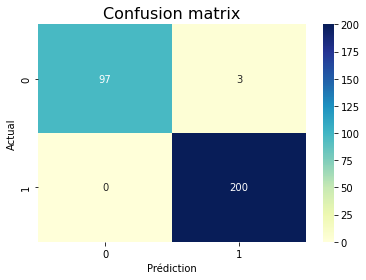

In [19]:
cnf_matrix = sklearn.metrics.confusion_matrix(y_test, predict_df['predict_billet'])
fig, ax = plt.subplots()
# create heatmap
_ = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
_ = plt.ylabel("Actual")
_ = plt.xlabel("Prédiction")
_ = plt.title("Confusion matrix", fontsize=16)

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            6.3 - Test accuracy
    </div>

### Le test d'accuracy évalue la capacité d'un modèle de classification à bien prédire à la fois les individus positifs et les individus négatifs (Vrai et Faux). Ainsi que le pourcentage de bonnes prédictions

In [20]:
# Voir : https://www.lovelyanalytics.com/2020/05/26/accuracy-recall-precision/
from sklearn.metrics import precision_score, recall_score, classification_report

test_accuracy = accuracy_score(y_test, predict_df["predict_billet"])*100
print("Accuracy:  %.3f %%" % test_accuracy)

# La précision permet de connaître le nombre de prédictions positifs bien effectuées
print("Precision:",precision_score(y_test, predict_df["predict_billet"]))

# Le recall permet de savoir le pourcentage de positifs bien prédit par notre modèle.
print("Recall:",recall_score(y_test, predict_df["predict_billet"]))
print(classification_report(y_test, predict_df["predict_billet"], digits=6))


Accuracy:  99.000 %
Precision: 0.9852216748768473
Recall: 1.0
              precision    recall  f1-score   support

       False   1.000000  0.970000  0.984772       100
        True   0.985222  1.000000  0.992556       200

    accuracy                       0.990000       300
   macro avg   0.992611  0.985000  0.988664       300
weighted avg   0.990148  0.990000  0.989961       300



---
<div>
    <div style="background-color: pink;" id="Conclusion">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Conclusion
        </h2>
        <font size="-0"><a href="#partie0">  🔝  </a></font>
    </div>
</div>

### Deux dataset  ont été créé l'un pour entraîner notre modèle(X_train, y_train) représenté par 80% de nos données et le second pour tester notre modèle (X_test, y_test) représenté par 20% de nos données, chacun possède 67% de billets vrais et 33% de billets faux.
### La méthode du coude a permit de déterminer 2 clusters le cluster 0 contenant les billets vrais et le cluster 1 contenant les billets faux.
### Le test d'accuracy nous indique que notre modèle a une performance de 99% avec un taux de précision de ~ 98%, à ce stade notre modèle est fiable.